Text(0.5, 0, 'Units Sold')

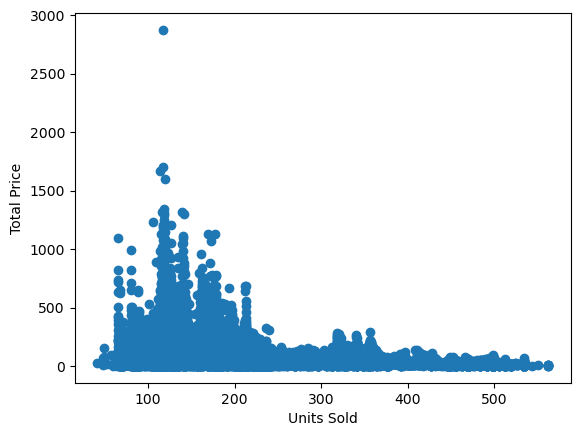

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('demand.csv')
plt.plot(data['Total Price'],data['Units Sold'],'o')
plt.ylabel('Total Price')
plt.xlabel('Units Sold')

Text(0.5, 0, 'Units Sold')

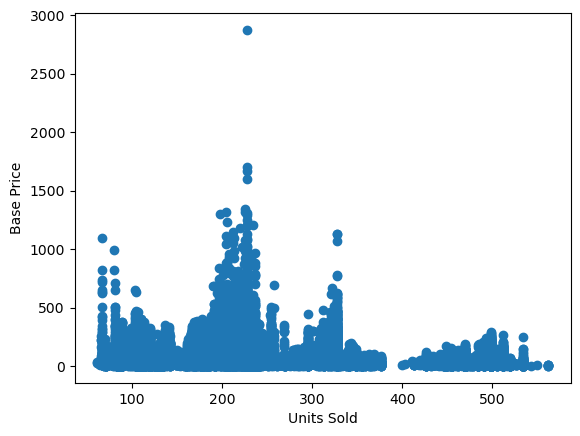

In [60]:
plt.plot(data['Base Price'],data['Units Sold'],'o')
plt.ylabel('Base Price')
plt.xlabel('Units Sold')

In [89]:
from LinearRegression import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error
import numpy as np
import pickle


def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return df[indices_to_keep].astype(np.float64)
data = clean_dataset(data)
X = data[['Total Price','Base Price']]
y =  data['Units Sold']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)
model = LinearRegression(lr = 0.00001,n_iters=1000)
mod = Lasso()
mod2 = Ridge()
model.fit(np.array(X_train),np.array(y_train))
mod.fit(np.array(X_train),np.array(y_train))
mod2.fit(np.array(X_train),np.array(y_train))

prediction = model.predict(np.array(X_test))
y_pred = mod.predict(np.array(X_test))
y_pred2 = mod2.predict(np.array(X_test))
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)
with open('lasso_regression_model.pkl', 'wb') as f:
    pickle.dump(mod, f)
with open('ridge_regression_model.pkl', 'wb') as f:
    pickle.dump(mod2, f)

print(mean_absolute_error(np.array(y_test),prediction))
print(mean_absolute_error(np.array(y_test),y_pred))
print(mean_absolute_error(np.array(y_test),y_pred2))




38.34642484851309
32.95935811233738
32.967395019251455


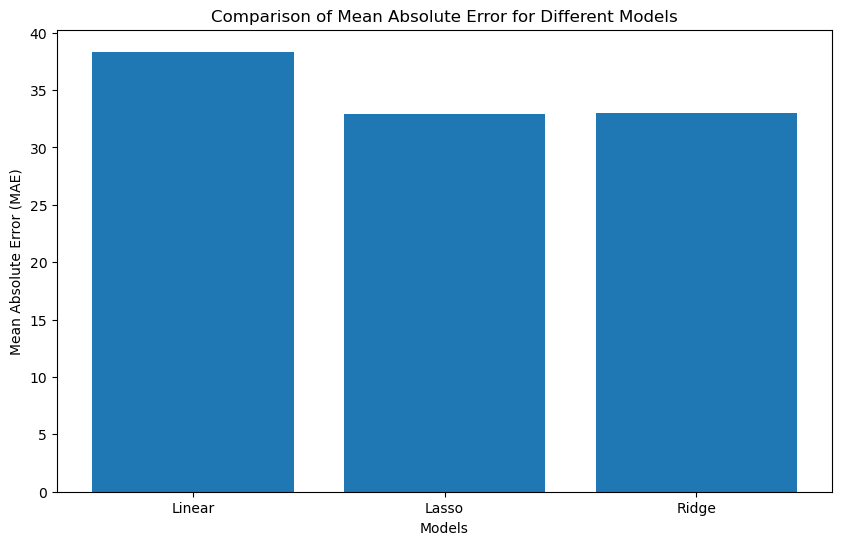

In [90]:
plt.figure(figsize=(10, 6))
plt.bar(['Linear','Lasso','Ridge'],[mean_absolute_error(np.array(y_test),prediction),mean_absolute_error(np.array(y_test),y_pred),mean_absolute_error(np.array(y_test),y_pred2)])
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of Mean Absolute Error for Different Models')
plt.show()

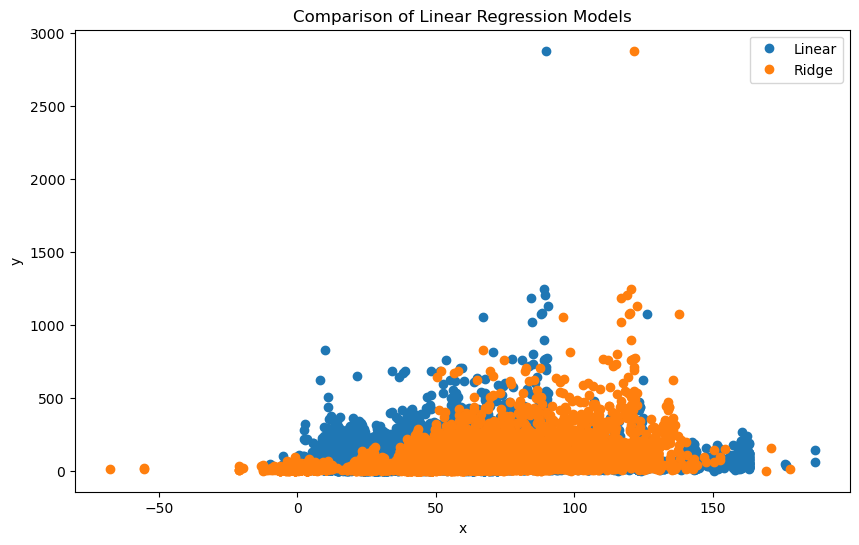

In [91]:
plt.figure(figsize=(10, 6))
plt.plot(prediction, y_test,'o', label='Linear')
plt.plot(y_pred2, y_test,'o', label='Ridge')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of Linear Regression Models')
plt.legend()
plt.show()

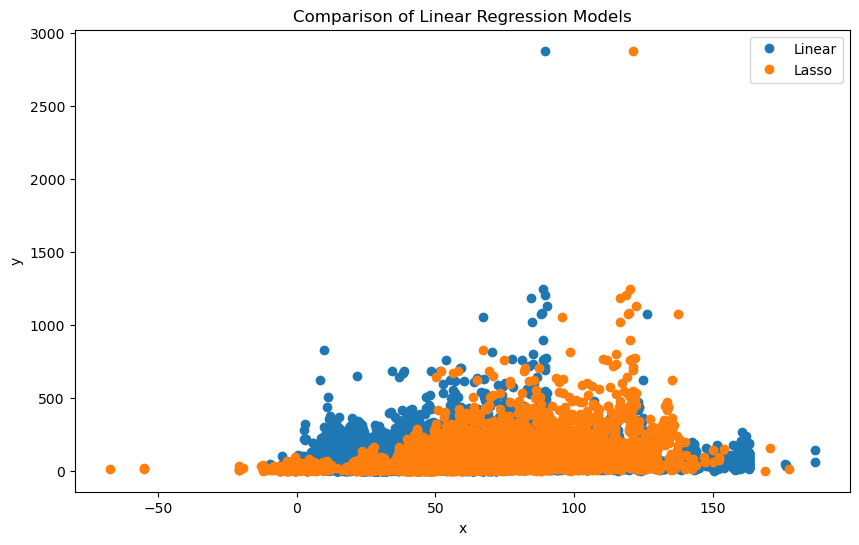

In [92]:
plt.figure(figsize=(10, 6))
plt.plot(prediction, y_test,'o', label='Linear')
plt.plot(y_pred, y_test,'o', label='Lasso')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of Linear Regression Models')
plt.legend()
plt.show()

In [93]:
p_val = [240,300]
prediction = model.predict([p_val])
y_pred = mod.predict([p_val])
y_pred2 = mod2.predict([p_val])
print(f"Around {int(prediction)} units sold using our linear regression model")
print(f"Around {int(y_pred)} units sold using Lasso regression")
print(f"Around {int(y_pred2)} units sold using Ridge regression")

Around 72 units sold using our linear regression model
Around 73 units sold using Lasso regression
Around 73 units sold using Ridge regression
